# MNIST digit classification (Tensorflow 1.13.1)

In [24]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
tf.logging.set_verbosity(tf.logging.ERROR)
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
print(tf.__version__)

1.13.1


## Loading the dataset

In [8]:
mnist = input_data.read_data_sets("data/mnist", one_hot=True)

Extracting data/mnist\train-images-idx3-ubyte.gz
Extracting data/mnist\train-labels-idx1-ubyte.gz
Extracting data/mnist\t10k-images-idx3-ubyte.gz
Extracting data/mnist\t10k-labels-idx1-ubyte.gz


In [9]:
print("No of images in training set {}".format(mnist.train.images.shape))
print("No of labels in training set {}".format(mnist.train.labels.shape))

print("No of images in test set {}".format(mnist.test.images.shape))
print("No of labels in test set {}".format(mnist.test.labels.shape))

No of images in training set (55000, 784)
No of labels in training set (55000, 10)
No of images in test set (10000, 784)
No of labels in test set (10000, 10)


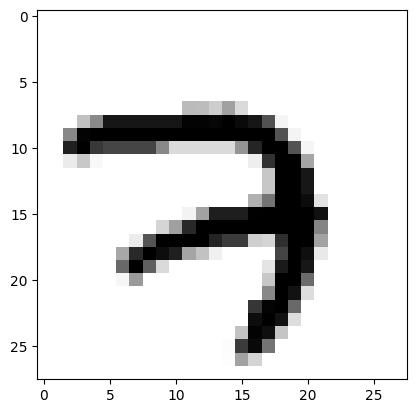

In [10]:
img1 = mnist.train.images[0].reshape(28,28)
plt.imshow(img1, cmap='Greys')

## Defining no. of neurons in each layer

In [25]:
num_input = 784  
num_hidden1 = 512  
num_hidden2 = 256  
num_hidden_3 = 128  
num_output = 10  

## Defining placeholders

In [12]:
with tf.name_scope('input'):
    X = tf.placeholder("float", [None, num_input])

with tf.name_scope('output'):
    Y = tf.placeholder("float", [None, num_output])

In [13]:
with tf.name_scope('weights'):
    
        weights = {
        'w1': tf.Variable(tf.truncated_normal([num_input, num_hidden1], stddev=0.1),name='weight_1'),
        'w2': tf.Variable(tf.truncated_normal([num_hidden1, num_hidden2], stddev=0.1),name='weight_2'),
        'w3': tf.Variable(tf.truncated_normal([num_hidden2, num_hidden_3], stddev=0.1),name='weight_3'),
        'out': tf.Variable(tf.truncated_normal([num_hidden_3, num_output], stddev=0.1),name='weight_4'),
    }


In [14]:
with tf.name_scope('biases'):

    biases = {
        'b1': tf.Variable(tf.constant(0.1, shape=[num_hidden1]),name='bias_1'),
        'b2': tf.Variable(tf.constant(0.1, shape=[num_hidden2]),name='bias_2'),
        'b3': tf.Variable(tf.constant(0.1, shape=[num_hidden_3]),name='bias_3'),
        'out': tf.Variable(tf.constant(0.1, shape=[num_output]),name='bias_4')
    }

## Forward Propagation

In [15]:
with tf.name_scope('Model'):
    
    with tf.name_scope('layer1'):
        layer_1 = tf.nn.relu(tf.add(tf.matmul(X, weights['w1']), biases['b1']) )   
    
    with tf.name_scope('layer2'):
        layer_2 = tf.nn.relu(tf.add(tf.matmul(layer_1, weights['w2']), biases['b2']))
        
    with tf.name_scope('layer3'):
        layer_3 = tf.nn.relu(tf.add(tf.matmul(layer_2, weights['w3']), biases['b3']))
        
    with tf.name_scope('output_layer'):
         y_hat = tf.nn.sigmoid(tf.matmul(layer_3, weights['out']) + biases['out'])

## Compute Loss and Backpropagation

In [16]:
with tf.name_scope('Loss'):
        loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_hat,labels=Y))

In [17]:
optimizer = tf.train.AdamOptimizer(1e-4).minimize(loss)

##  Compute Accuracy of the model

In [18]:
with tf.name_scope('Accuracy'):
    
    predicted_digit = tf.argmax(y_hat, 1)
    actual_digit = tf.argmax(Y, 1)
    
    correct_pred = tf.equal(predicted_digit,actual_digit)
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

## Create Summary

In [19]:
tf.summary.scalar("Accuracy", accuracy)

tf.summary.scalar("Loss", loss)

<tf.Tensor 'Loss_1:0' shape=() dtype=string>

In [20]:
merge_summary = tf.summary.merge_all()

## Train the Model

In [21]:
init = tf.global_variables_initializer()

In [22]:
batch_size = 128
num_iterations = 1000

In [23]:
with tf.Session() as sess:

    #run the initializer
    sess.run(init)

    #save the event files
    summary_writer = tf.summary.FileWriter('./graphs', graph=tf.get_default_graph())

    #train for some n number of iterations
    for i in range(num_iterations):
        
        #get batch of data according to batch size
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        
        #train the network
        sess.run(optimizer, feed_dict={
            X: batch_x, Y: batch_y
            })

        #print loss and accuracy on every 100th iteration
        if i % 100 == 0:
            
            #compute loss, accuracy and summary
            batch_loss, batch_accuracy,summary = sess.run(
                [loss, accuracy, merge_summary], feed_dict={X: batch_x, Y: batch_y}
                )

            #store all the summaries
            summary_writer.add_summary(summary, i)


            print('Iteration: {}, Loss: {}, Accuracy: {}'.format(i,batch_loss,batch_accuracy))

Iteration: 0, Loss: 2.3037500381469727, Accuracy: 0.0859375
Iteration: 100, Loss: 1.7550171613693237, Accuracy: 0.8125
Iteration: 200, Loss: 1.660329818725586, Accuracy: 0.8359375
Iteration: 300, Loss: 1.5946669578552246, Accuracy: 0.90625
Iteration: 400, Loss: 1.5681958198547363, Accuracy: 0.9140625
Iteration: 500, Loss: 1.552886962890625, Accuracy: 0.9296875
Iteration: 600, Loss: 1.5414009094238281, Accuracy: 0.953125
Iteration: 700, Loss: 1.541434407234192, Accuracy: 0.9375
Iteration: 800, Loss: 1.52506422996521, Accuracy: 0.953125
Iteration: 900, Loss: 1.5150119066238403, Accuracy: 0.9609375
